<a href="https://colab.research.google.com/github/Therushi/Machine-Learning/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pydotplus

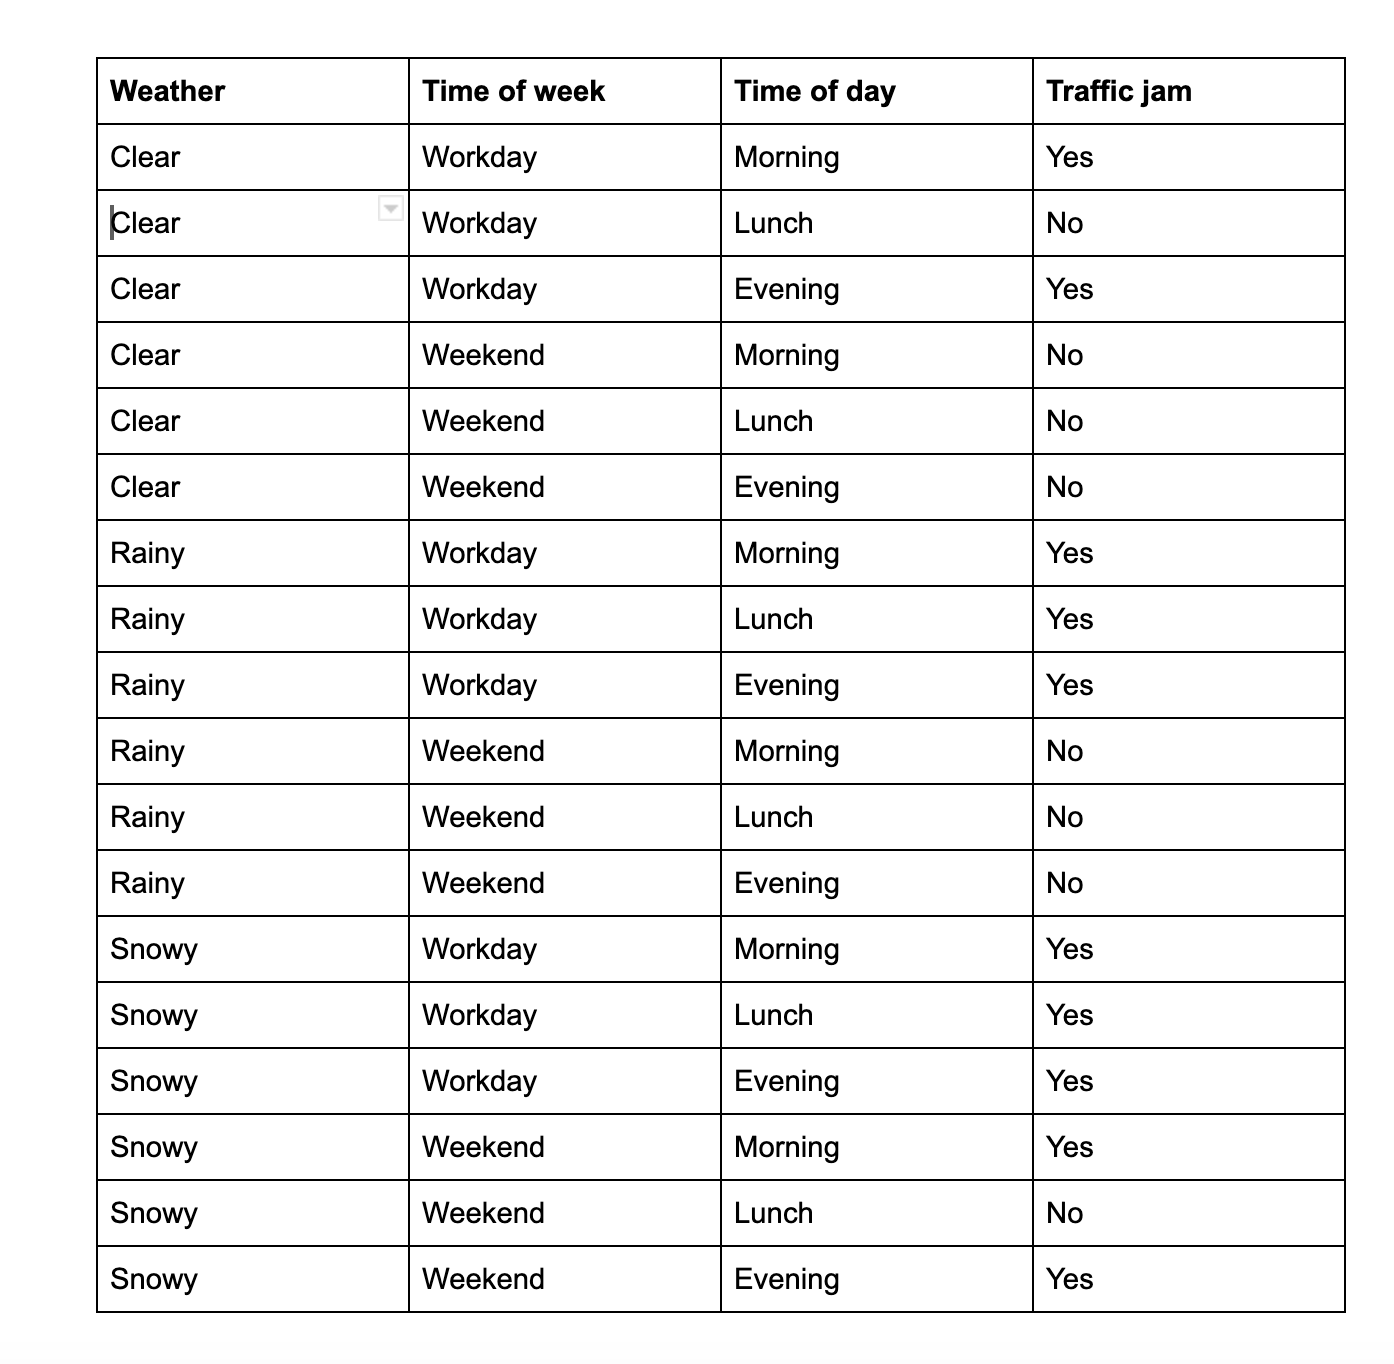

In [ ]:
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus

In [ ]:
def getWeather():
  return['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear','Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy','Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy']
  

In [ ]:
def getTimeOfWeek():
  return ['Workday', 'Workday', 'Workday','Weekend', 'Weekend', 'Weekend','Workday', 'Workday', 'Workday','Weekend', 'Weekend', 'Weekend','Workday', 'Workday', 'Workday','Weekend', 'Weekend', 'Weekend']

In [ ]:
def getTimeOfDay():
    return ['Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            ]

def getTrafficJam():
    return ['Yes', 'No', 'Yes',
            'No', 'No', 'No',
            'Yes', 'Yes', 'Yes',
            'No', 'No', 'No',
            'Yes', 'Yes', 'Yes',
            'Yes', 'No', 'Yes']

So We Know that computers Having a Hard time when dealing with the text and we can make their lives easier by converting the text to numerical value.

### **Label Encoder**
We will use this Label Encoder provided by scikit to transform categorical data from text to numbers.If we have n posiible values in our dataset, then LabelEncoder model will transfrom it into numbers from 0 to n-1 so that each textual value has a number representation.

# Let's Look into an example

In [ ]:
time = ['Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            ]

labelEncoder = preprocessing.LabelEncoder()
encodedTime = labelEncoder.fit_transform(time)
print(encodedTime)

[2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0]


## **Training the Decision Tree Classifier model**

In [ ]:
#get the data 
weather = getWeather()
timeOfWeek = getTimeOfWeek()
timeOfDay = getTimeOfDay()
trafficJam = getTrafficJam()


In [ ]:
labelEncoder = preprocessing.LabelEncoder()


In [ ]:
#Encode the features and the Labels
encodedWeather = labelEncoder.fit_transform(weather)
encodedTimeOfWeek = labelEncoder.fit_transform(timeOfWeek)
encodedTimeOfDay = labelEncoder.fit_transform(timeOfDay)
encodedTrafficJam = labelEncoder.fit_transform(trafficJam)

Lets see the Encoded data

In [ ]:
print(encodedTimeOfDay)
print(encodedTimeOfWeek)
print(encodedTrafficJam)
print(encodedWeather)

[2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0]
[1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0]
[1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1]
[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2]


Lets build the features 


In [ ]:
features = []
for i in range(len(encodedWeather)):
  features.append([encodedWeather[i], encodedTimeOfWeek[i], encodedTimeOfDay[i]])

In [ ]:
print(features)

[[0, 1, 2], [0, 1, 1], [0, 1, 0], [0, 0, 2], [0, 0, 1], [0, 0, 0], [1, 1, 2], [1, 1, 1], [1, 1, 0], [1, 0, 2], [1, 0, 1], [1, 0, 0], [2, 1, 2], [2, 1, 1], [2, 1, 0], [2, 0, 2], [2, 0, 1], [2, 0, 0]]


In [ ]:
classifier = tree.DecisionTreeClassifier()

In [ ]:
classifier = classifier.fit(features, encodedTrafficJam)

Now we can use the model we have trained to make predictions about the traffic jam.

In [ ]:
#snowy , workday , morning
print(classifier.predict([[2,1,2]]))

[1]


print 1 Means YES 
and 0 Means NO

In [ ]:
# clear weekend Lunch
print(classifier.predict([[0,0,1]]))

[0]


## **Decision Tree Visualisation**

In [ ]:
feature_names = ['Weather','Time of Week', 'Time of Day']
target_names = ['Yes', 'No']

#Build the daya
dot_data = tree.export_graphviz(classifier,out_file=None,feature_names=feature_names,class_names=target_names)

#build the graph
graph = pydotplus.graph_from_dot_data(dot_data)


In [ ]:
#show the image
Image(graph.create_png())
graph.write_png("tree.png")

True

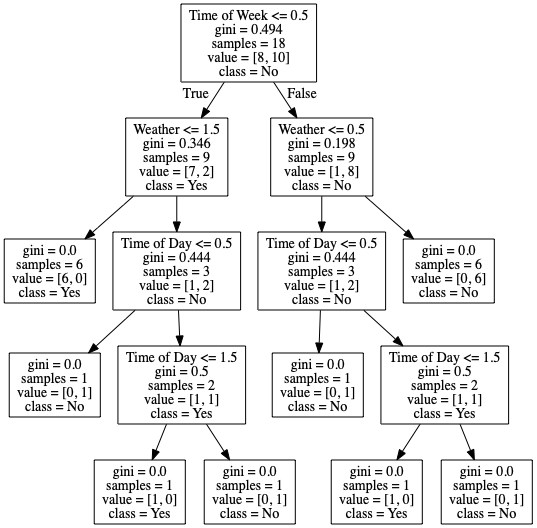